In [447]:
!pip install pandas

In [448]:
import pandas as pd

In [449]:
import matplotlib.pyplot as plt
import numpy as np

In [450]:
df = pd.read_csv('liess.csv')

In [451]:
df = pd.read_csv('liess.csv', header=None, names=['date', 'lie'])

In [459]:
# df.head(5)

,date,lie
0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...
1,2017-01-21,A reporter for Time magazine — and I have been...
2,2017-01-23,Between 3 million and 5 million illegal votes ...
3,2017-01-25,"Now, the audience was the biggest ever. But th..."
4,2017-01-25,Take a look at the Pew reports (which show vot...


In [453]:
from datetime import datetime

In [454]:
df['date'] = pd.to_datetime(df['date'])

In [455]:
# df.head(5)

In [456]:
df['date'].groupby([df.date.dt.month]).agg('count')

date
1     12
2     29
3     15
4     23
5     14
6     18
7     15
8     10
9     13
10    28
11     3
Name: date, dtype: int64

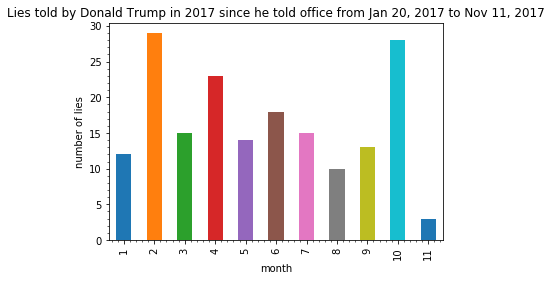

In [460]:
df['date'].groupby([df.date.dt.month]).agg('count').plot(kind='bar')
plt.ylabel('number of lies')
plt.xlabel('month')
plt.title('Lies told by Donald Trump in 2017 since he told office from Jan 20, 2017 to Nov 11, 2017')
plt.minorticks_on()

In [74]:
#a = df.lie.str.contains('Obama').sum()
#b = df.lie.str.contains('Iraq').sum()
#c = df.lie.str.contains('China').sum()
#d = df.lie.str.contains('media').sum()
#e = df.lie.str.contains('Russia').sum()
#print(a,b,c,d,e)

10 2 4 4 6


In [461]:
#def check_name(x):
#    return 'Obamacare' in str(x)
#df['lie'].apply(check_name).value_counts()

In [462]:
#df[df['lie'].apply(check_name)]

,date,lie
35,2017-02-24,Obamacare covers very few people — and remembe...
36,2017-02-27,"Since Obamacare went into effect, nearly half ..."
79,2017-05-01,"Well, we are protecting pre-existing condition..."


In [463]:
#for text in df['lie'][:10]:
#    print(text)

In [464]:
all_text = []
for text in df['lie']:
    all_text.extend(text.split())

In [465]:
word_count = {}

In [466]:
for word in all_text:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word] + 1

In [61]:
pd.Series(word_count).to_frame().reset_index()

,index,0
0,"""Welcome",1
1,$17,1
2,$200,1
3,$350,1
4,$600,1
5,$70,1
6,$700,3
7,$725,8
8,&,4
9,'a,1


In [467]:
pd.Series(word_count).sort_values(ascending=False)

the            198
of             109
I               86
in              78
and             75
to              74
a               53
have            45
that            44
was             40
—               33
you             32
they            31
is              29
are             24
with            23
for             22
We              20
about           20
it              20
very            20
The             20
on              19
out             19
by              19
been            18
we              18
saved           17
just            17
people          17
              ... 
made-up          1
lowest.          1
low              1
loved            1
love             1
lots             1
lost!            1
losing           1
looks            1
looking          1
look,            1
long-term        1
lobbying         1
lives,           1
lives            1
live             1
lining           1
lines            1
like,            1
lights.          1
lights           1
lie         

In [468]:
!pip install nltk

In [469]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Josephine
[nltk_data]     Wong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [479]:
from nltk.corpus import stopwords

In [480]:
# set(stopwords.words('english'))

In [481]:
stop_words = set(['I', '—', 'a', 'about', 'The', 'We', 'They', 'And', 'You', 'But', 'one', 'going', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd',
 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself',
 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same',
 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'say', 'think', 'look', 'got', 'say', 'many', 'no', 'way', "we're", "We're", "it's", 'it.', "It's", 'really', 'said', 'get', 'cut', 'like', '–', "it's", 'it', "it’s", 'know', 'set', 'even', 'already', 'want', "they’re", 'As',"can't", 'It', 'them.', 'now,'])

In [482]:
df_word_count = pd.Series(word_count).to_frame().reset_index()

In [483]:
df_word_count.sort_values(by=0, ascending=False)

,index,0
1182,the,198
908,of,109
147,I,86
736,in,78
352,and,75
1221,to,74
314,a,53
688,have,45
1177,that,44
1276,was,40


In [484]:
def is_not_stop_word(x):
    return x not in stop_words
df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False)

,index,0
947,people,17
1068,saved,17
710,highest-taxed,15
1327,world.,14
877,nation,14
413,billions,12
727,hundreds,10
857,million,10
888,never,9
859,millions,9


In [485]:
df = df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False)
df

,index,0
947,people,17
1068,saved,17
710,highest-taxed,15
1327,world.,14
877,nation,14
413,billions,12
727,hundreds,10
857,million,10
888,never,9
859,millions,9


In [486]:
df.to_csv('frenquencies.csv')

In [487]:
!pip install wordcloud

In [488]:
from wordcloud import WordCloud
from PIL import Image
from subprocess import check_output
import matplotlib.pyplot as plt
stopwords= set(STOPWORDS)

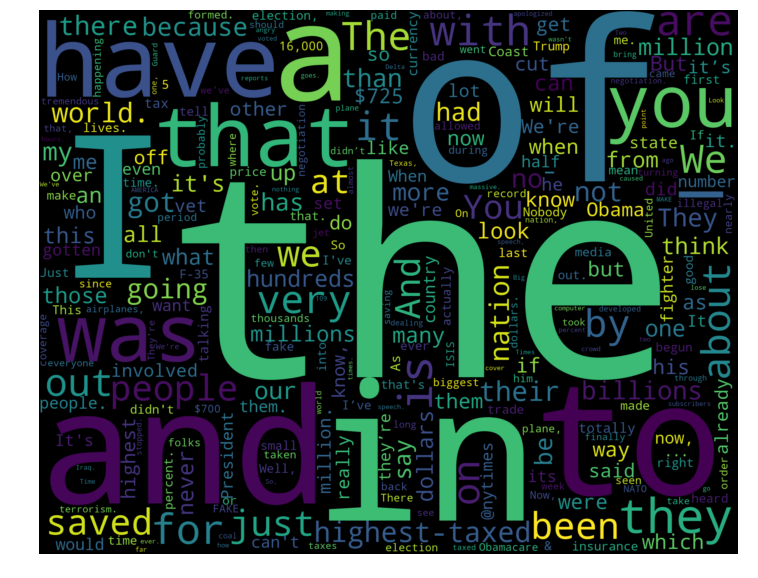

In [489]:
wc = WordCloud(
    background_color="black", 
    width=1800,
    height=1400,
    max_words=300,
    stopwords=STOPWORDS
    ).generate_from_frequencies(word_count)
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [441]:
wordcloud = WordCloud(
    background_color="black",
    colormap="prism",
    stopwords=STOPWORDS,
    width=1800,
    height=1400,
    max_words=500,
    max_font_size=400,
    ).generate(str(df['index']))

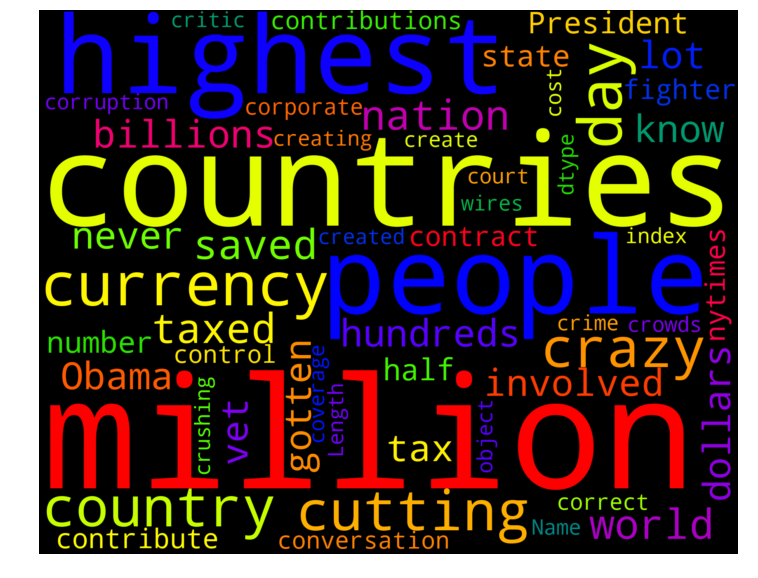

In [478]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()